# Challenge 1: Binary Detection 1

The first step is to import relevant libraries.

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The second step is to import data from the given file.

In [97]:
df = pd.DataFrame.from_csv("1challenge.csv")
df0 = df.loc[df['label'] == 1.0]
df1 = df.loc[df['label'] == 0.0]
dftest = df.loc[~((df['label'] == 0.0) | (df['label'] == 1.0))]
print(df0.shape)
print(df1.shape)
print(dftest.shape)

(4000, 3)
(6000, 3)
(5000, 3)


One can use the data in their original Pandas DataFrame format, or one can transform these objects into Numpy-arrays.

In [98]:
TrainingData0 = df0.as_matrix(columns=None)
TrainingData1 = df1.as_matrix(columns=None)
TestData = dftest.as_matrix(columns=['Y0', 'Y1'])

It may be helpful to visualize the data.

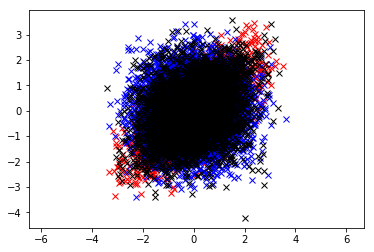

In [99]:
plt.plot(TrainingData0[:,0], TrainingData0[:,1], 'x', color='r')
plt.plot(TrainingData1[:,0], TrainingData1[:,1], 'x', color='b')
plt.plot(TestData[:,0], TestData[:,1], 'x', color='k')
plt.axis('equal')
plt.show()

# Assumption
- Multivariate gaussian distribution
- So finding the mean and covariance of the data points

In [100]:
tau = np.shape(TrainingData0)[0]/np.shape(TrainingData1)[0]
covariance_0 = np.cov(TrainingData0[:,0],TrainingData0[:,1])
covariance_1 = np.cov(TrainingData1[:,0],TrainingData1[:,1])
mean1_0 = np.mean(TrainingData0[:,0])
mean2_0 = np.mean(TrainingData0[:,1])
mean1_1 = np.mean(TrainingData1[:,0])
mean2_1 = np.mean(TrainingData1[:,1])


In [101]:
from scipy.stats import multivariate_normal
y_0 = multivariate_normal([mean1_0,mean2_0],covariance_0)
y_1 = multivariate_normal([mean1_1,mean2_1],covariance_1)

# Optimisation Criterion

In [102]:
output = []

for i in TestData:
    pd0 = y_0.pdf([i[0],i[1]])
    pd1 = y_1.pdf([i[0],i[1]])
    if pd1 > tau*pd0:
        output.append(0)
    elif (pd1 <= tau*pd0):
        output.append(1)
output = np.reshape(output,[np.shape(output)[0],-1])
TestData = np.hstack((TestData,output))
print(TestData)

[[ 0.49480236 -0.11188636  0.        ]
 [ 0.61887647  0.20908313  0.        ]
 [ 0.02262511  0.6519543   0.        ]
 ..., 
 [ 1.16359976 -1.42016958  0.        ]
 [ 1.08290467 -0.14040216  0.        ]
 [-0.39978063 -0.47363524  0.        ]]


- Adding the output in the dataframe

In [103]:
dftest = pd.DataFrame(TestData,columns=['Y0', 'Y1','label'])
df = pd.concat([df1, df0, dftest], join='outer', ignore_index=True)



- Checking the number of Labels1 and Labels0 after the predictions

In [104]:
df0 = df.loc[df['label'] == 1.0]
df1 = df.loc[df['label'] == 0.0]
dftest = df.loc[~((df['label'] == 0.0) | (df['label'] == 1.0))]
print(df0.shape)
print(df1.shape)
print(dftest.shape)

(5307, 3)
(9693, 3)
(0, 3)


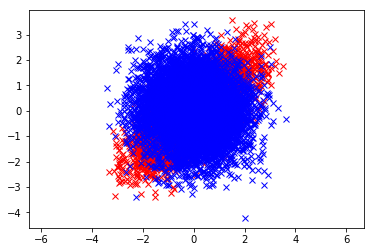

In [105]:
TrainingData0 = df0.as_matrix(columns=None)
TrainingData1 = df1.as_matrix(columns=None)
TestData = dftest.as_matrix(columns=['Y0', 'Y1'])
plt.plot(TrainingData0[:,0], TrainingData0[:,1], 'x', color='r')
plt.plot(TrainingData1[:,0], TrainingData1[:,1], 'x', color='b')
plt.axis('equal')
plt.show()

- Adding it to the CSV file

In [106]:
df.to_csv("1challenge_new.csv")